# Titanic ML Competition

Task : Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Data : [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Project Outline

- Read Data
- Understand basics about the data
  - Row Count, Data Types, Missing Data
- Visualise Data
- Exploratory Analysis
  - Correlations
  - Interesting Themes
- Data Cleaning
- Feature Engineering
- Prepare Data for Model
  - One Hot Encoding
  - Scaling
- Model Building
- Model Evaluation
  - Baseline


## Import Packages

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno

%matplotlib inline


## Read Data

In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train, test])

## Dataset Basics

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


891 rows, 12 columns

- PassengerId: Unique Id of a passenger.
- Survived: Whether the passenger survived or not
    - 1 = Survived, 0 = Did Not Survive
- Pclass: Ticket class. 
    - 1 = First Class, 2 = Second Class, 3 = Third Class
- Name: Passenger name
- Sex: Passenger gender
- Age: Passenger age
- SibSp: Number of siblings/spouses travelling with the passenger
- Parch: Number of parents/children travelling with the passenger
- Ticket: Ticket number
- Fare: Ticket Fare
- Cabin: Cabin number
- Embarked: Port from where the particular passenger was embarked/boarded.
    - C = Cherbourg, Q = Queenstown, S = Southampton

In [38]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
train_test,891.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0,1.0000


### Looking for Missing Data

In [39]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

<AxesSubplot: >

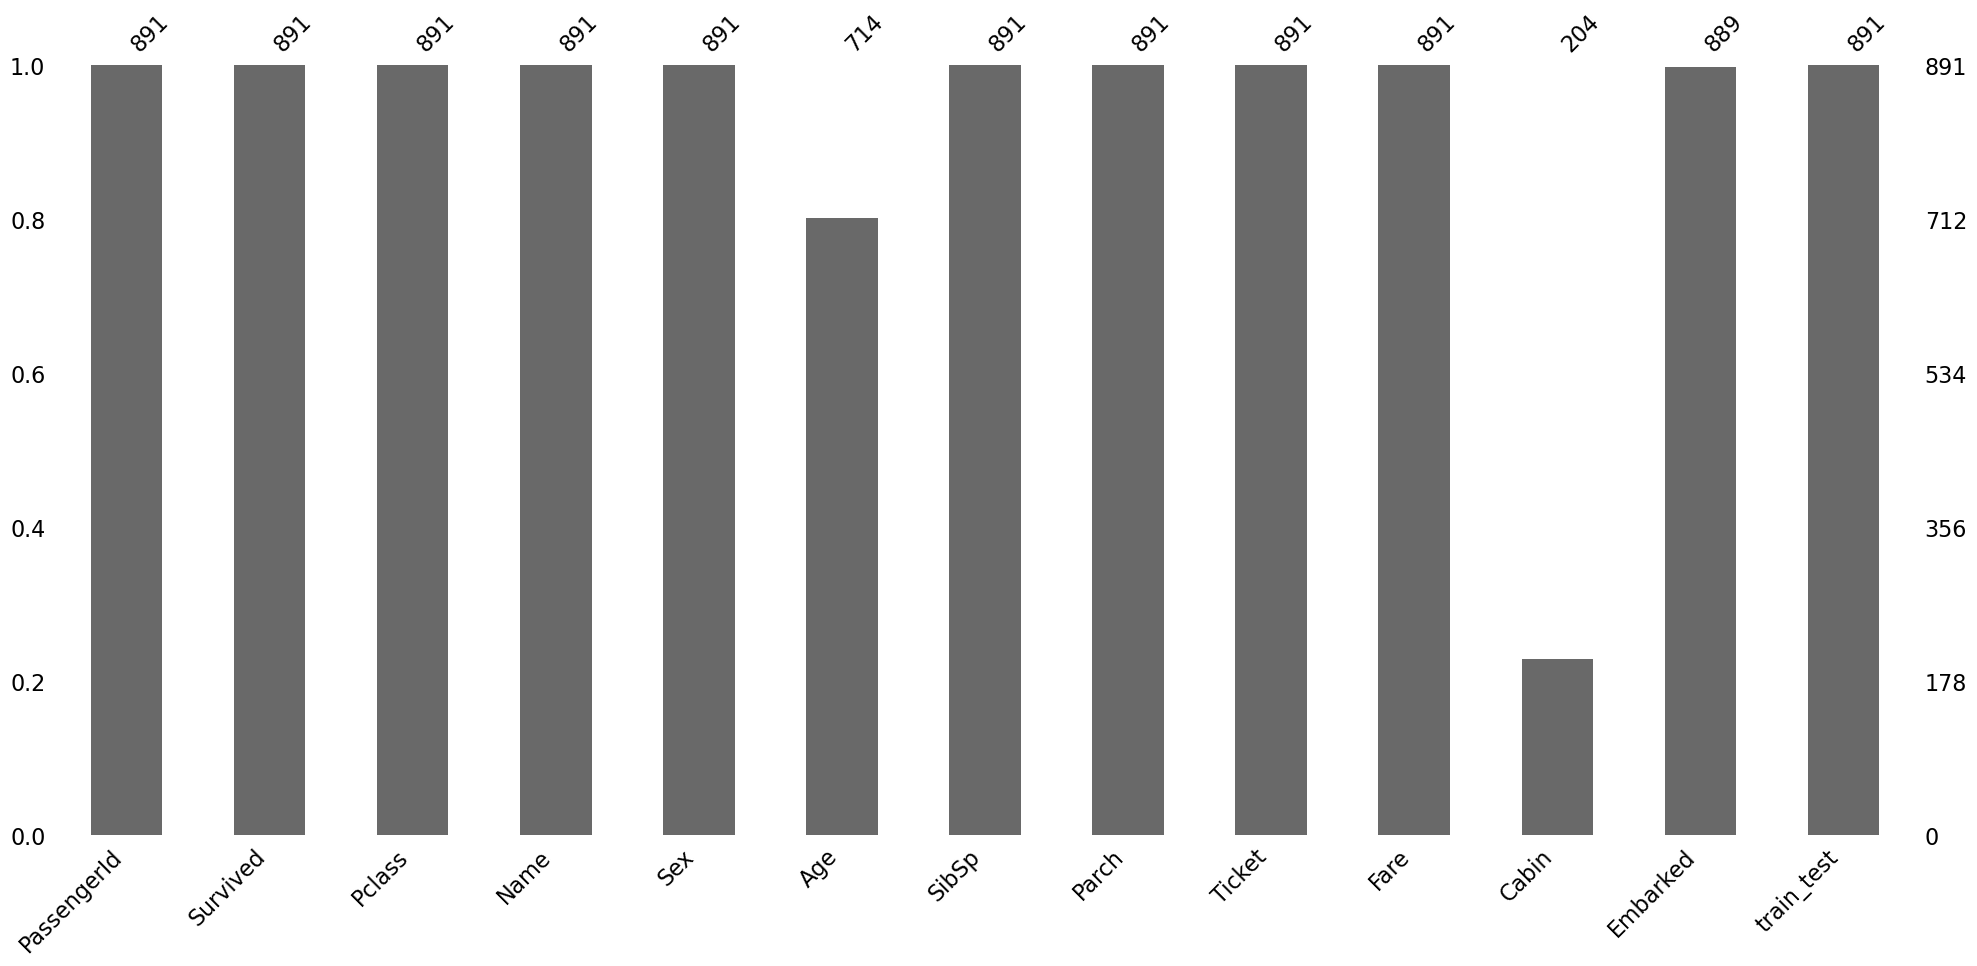

In [40]:
msno.bar(train)

- High number of missing values in Cabin column
- Age column has some missing values
- Embarked column has only 2 missing values

#### Nullity Correlation

<AxesSubplot: >

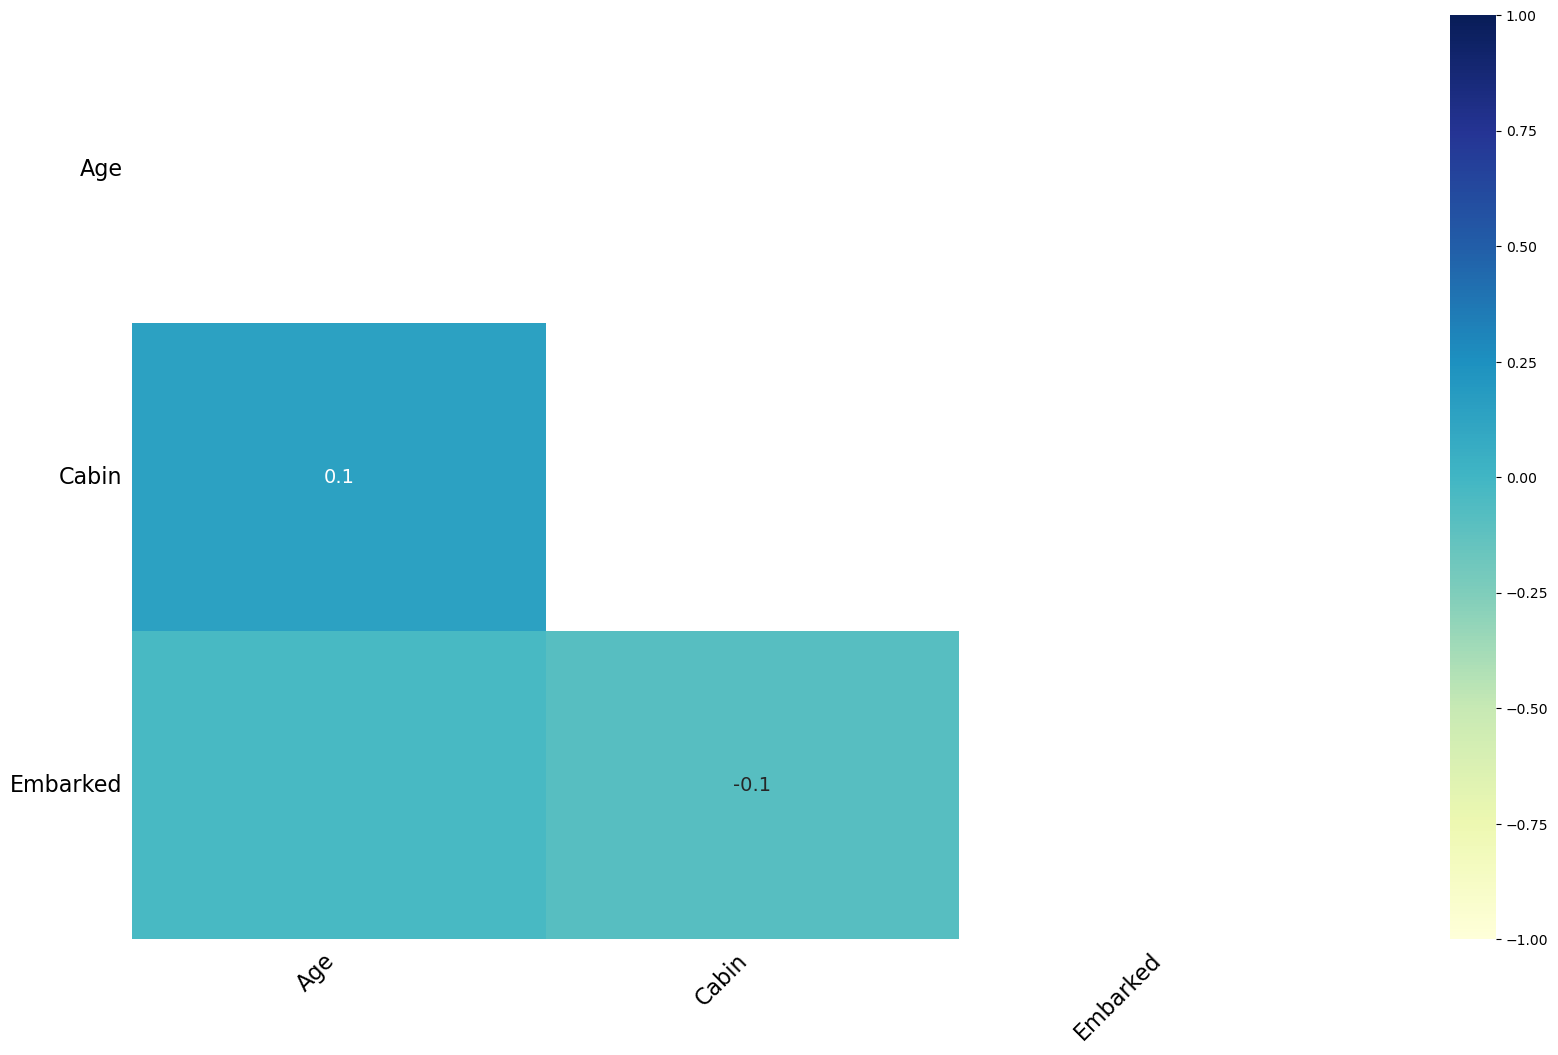

In [41]:
msno.heatmap(train, cmap='YlGnBu')

- None of the missing value columns are correlated with each other

#### Nullity Matrix

<AxesSubplot: >

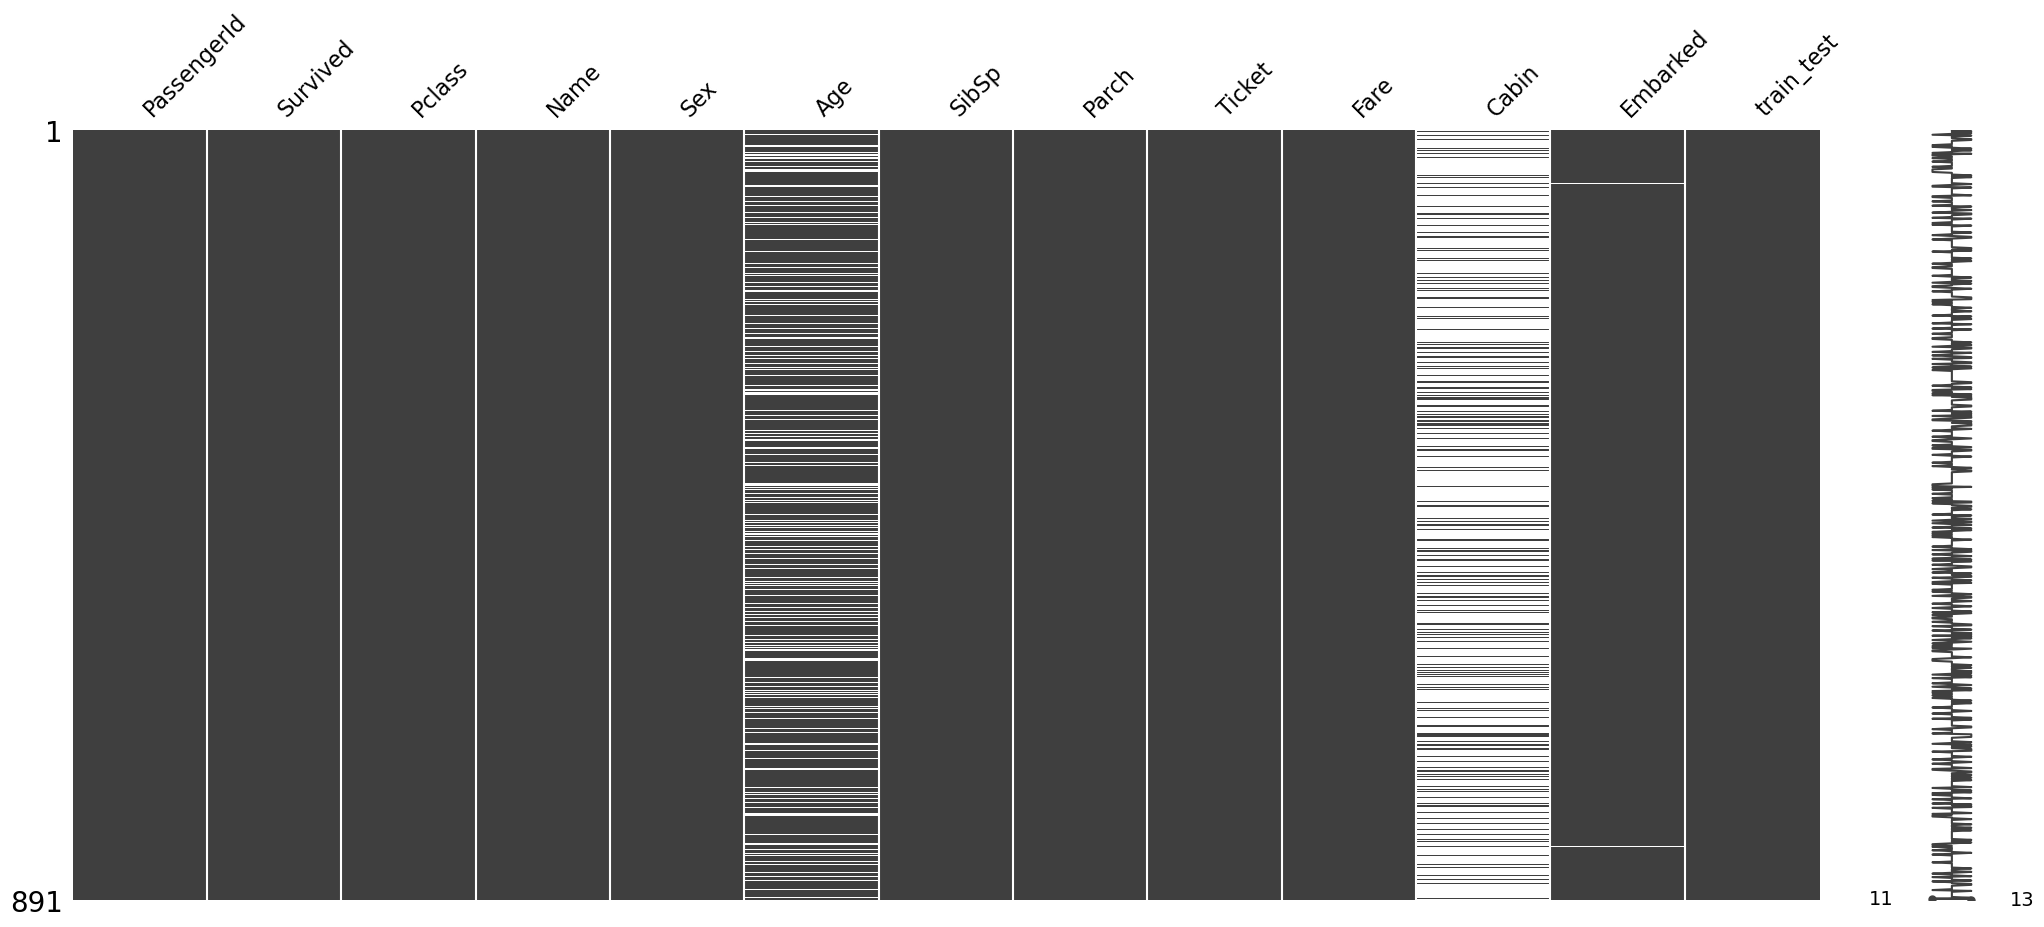

In [42]:
msno.matrix(train)

### Separate Numeric and Categorical Columns

In [43]:
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

## Exploratory Analysis

### Histograms of Numeric Columns

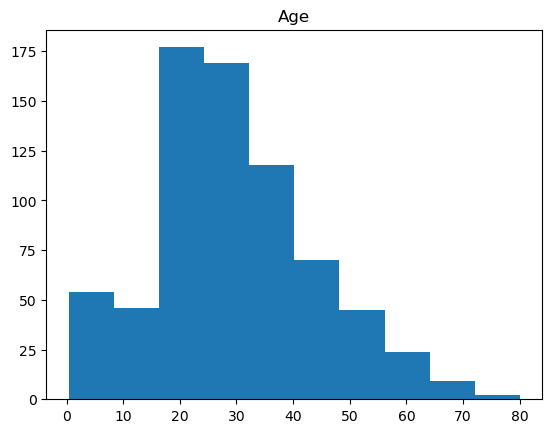

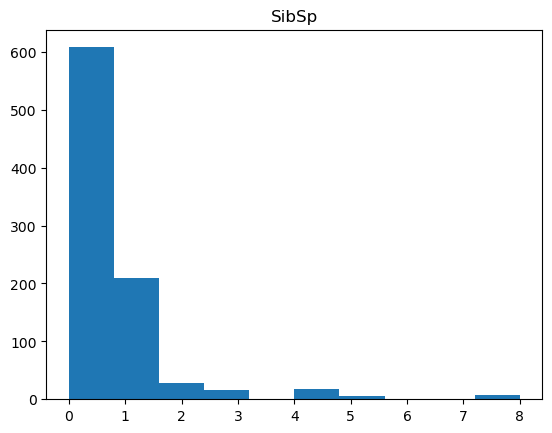

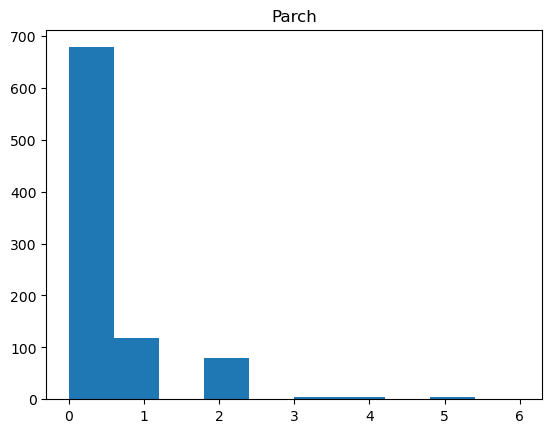

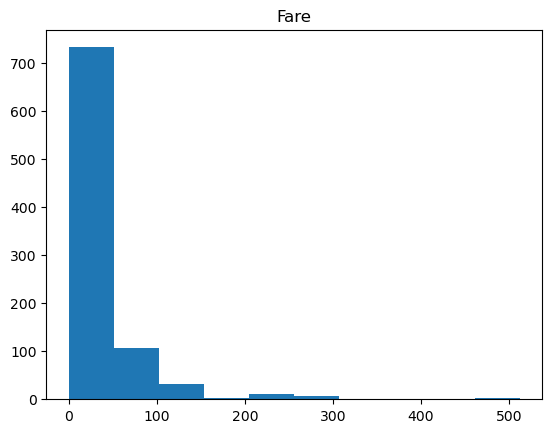

In [44]:
for column in train_num.columns:
    plt.hist(train_num[column])
    plt.title(column)
    plt.show()

Should consider normalising SibSp, Parch and Fare columns

### Correlations

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot: >

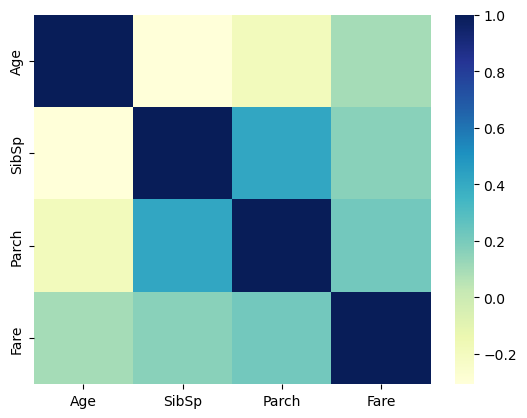

In [47]:
print(train_num.corr())
sns.heatmap(train_num.corr(), cmap = 'YlGnBu')

Strong Positive Correlations:
- SibSP and Parch

Strong Negative Correlations:
- Age and Parch
- Age and SibSp

### Survival Rates Across Numeric Columns

In [48]:
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Bar Plots of Categorical Columns

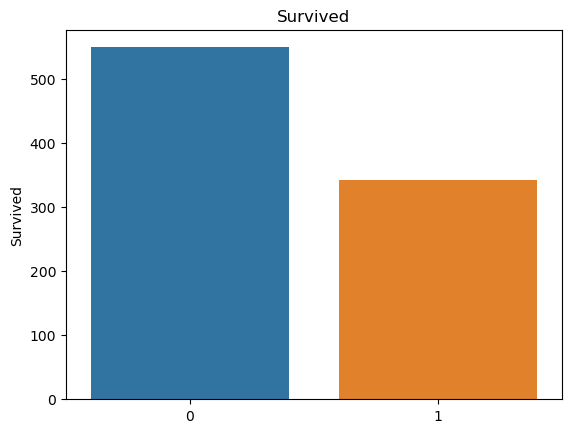

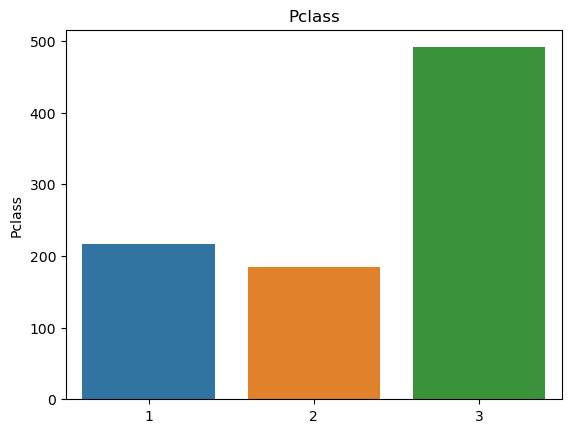

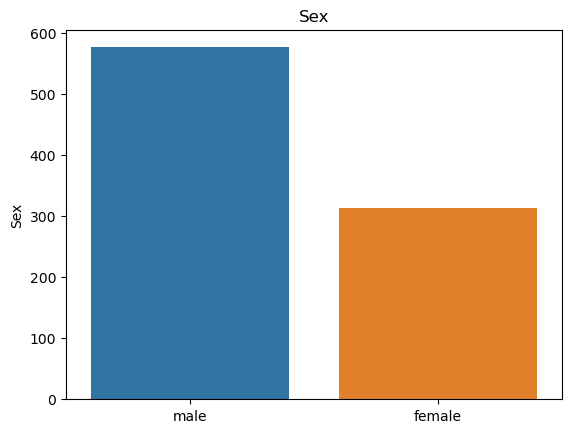

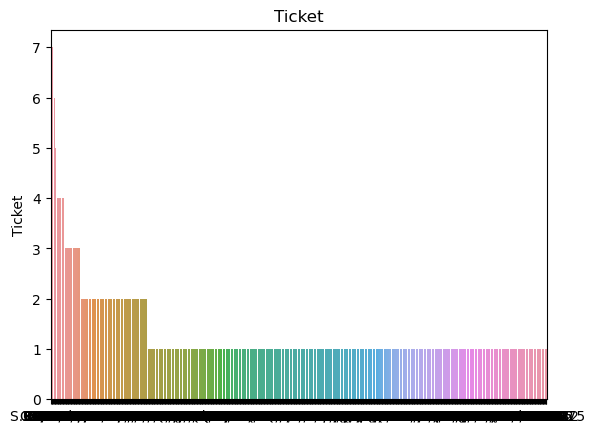

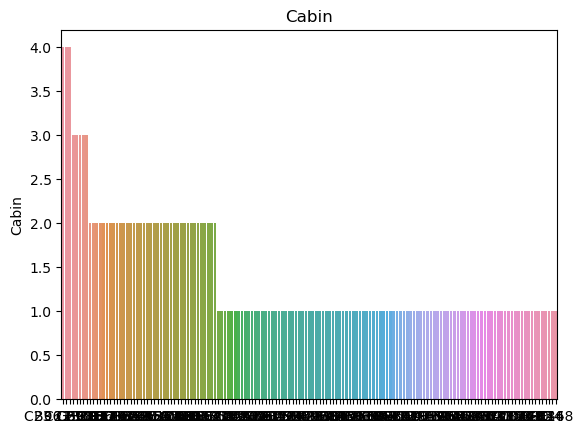

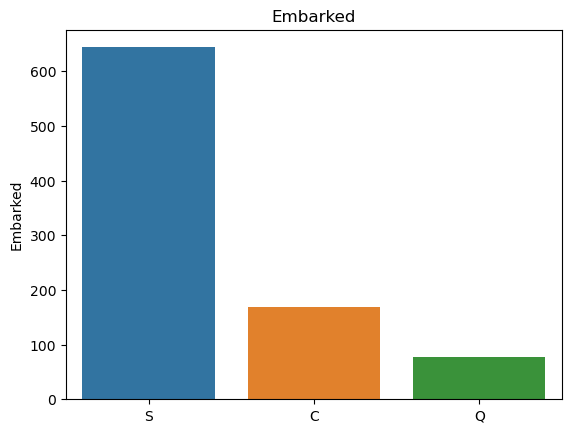

In [58]:
for column in train_cat.columns:
    sns.barplot(x = train_cat[column].value_counts().index, y = train_cat[column].value_counts()).set_title(column)
    plt.show()